# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

## Data Loading

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Species
The species_info.csv contains information on the different species in the National Parks.

In [2]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### Observations
The Observations.csv contains information from recorded sightings of different species throughout the national parks in the past 7 days. 

In [3]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Data Exploration

#### Species
For species, there are 4 columns and 5,824 rows while observations have 3 columns and 23,296 rows.

In [12]:
species.shape

(5824, 4)

In [8]:
observations.shape

(23296, 3)

In [10]:
print("Column names:", species.columns)
print("Column names:", observations.columns)

Column names: Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Column names: Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [11]:
print("Data types:", species.dtypes)
print("Data types:", observations.dtypes)

Data types: category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
Data types: scientific_name    object
park_name          object
observations        int64
dtype: object


Exploring the species data further, using the scientific_name column, there are 5,541 unique species.

In [13]:
print("Number of species:", species.scientific_name.nunique())

Number of species: 5541


There are 7 unique categories within the species table, with a mixture of animals and plants.

In [16]:
print("Number of categories:", species.category.nunique())
print("Categories:", species.category.unique())

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Next, we will explore the conservation_status column. There are 5 categories of statuses - NaN, Species of Concern, Endangered, Threatened and In Recovery.

In [17]:
print("Number of conservation statuses:", species.conservation_status.nunique())
print("Conservation statuses:", species.conservation_status.unique())

Number of conservation statuses: 4
Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


The NaN category is concerning as it is usually attributed to incomplete or missing data. Let's explore further.

In [20]:
print("Number of NaN Values:", species.conservation_status.isna().sum())

Number of NaN Values: 5633


In [21]:
print("Number in each conservation status:", species.groupby("conservation_status").size())

Number in each conservation status: conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


As seen, there are 161 species of concern, 16 endangered, 10 threatened, 4 in recovery while 5,633 are species without concerns.

#### Observations

In [24]:
print("Number of observations:", observations.park_name.nunique())
print("Number of observations:", observations.park_name.unique())

Number of observations: 4
Number of observations: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [25]:
print("Total nunber of observations:", observations.observations.sum())

Total nunber of observations: 3314739


In [26]:
print("Number of NaN Values:", observations.observations.isna().sum())

Number of NaN Values: 0


## Data Analysis

I will clean the observation_status column from the species table, to ensure that the 'NaN' values are not confused with missing values but as having no intervention needed.

In [33]:
species.fillna('No Intervention', inplace=True)

species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next, I want to view which species are recovering more than the others, and which are still threatened or in danger. Looking at the conservation_status column,

In [44]:
conservation_categories = species[species.conservation_status != 'No Intervention'].groupby(["conservation_status", "category"])\
    ["scientific_name"].count()\
    .unstack()

conservation_categories

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

Text(0, 0.5, 'Number of Species')

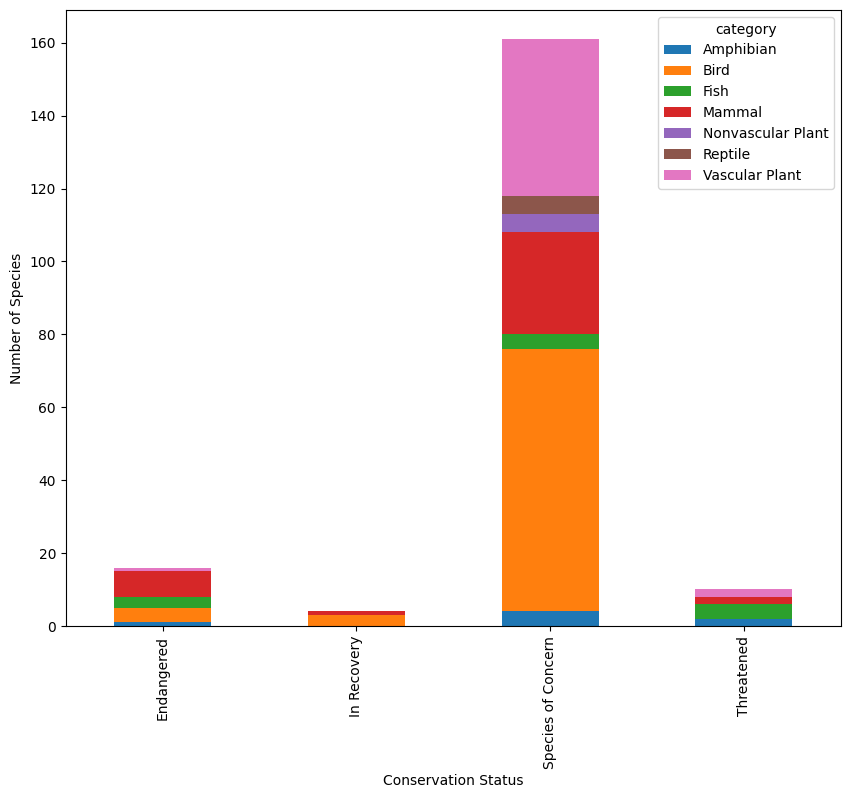

In [91]:
ax = conservation_categories.plot(kind = 'bar', figsize = (10,8), stacked = True)

ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

#### In Conservation
Are certain species more endangered than others?

In [47]:
species["is_protected"] = species.conservation_status != "No Intervention"

In [57]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


## Statistical Significance
This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created.

The first test will be called contingency1 and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them.

In [55]:
from scipy.stats import chi2_contingency

In [56]:
contingency1 = [[30, 146],
              [75, 413]]

chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between Reptile and Mammal. This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.

In [58]:
contingency2 = [[30, 146],
               [5, 73]]

chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

## Species in Parks
The first step is to look at the the common names from species to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [59]:
from itertools import chain
import string

In [61]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [62]:
common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [63]:
clean_names = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    clean_names.append(item)
    
clean_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Now, I will collapse all the words into a list for easier reference.

In [65]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_names))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that Bat occurred 23 times while Shrew came up 18 times.

In [66]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
129,Bat,23
107,Shrew,18
121,Myotis,17
29,Mouse,16
163,Chipmunk,13
113,Squirrel,12
11,American,12
19,Vole,11
176,Eastern,11
49,Western,10


There are different scientific names that represent the species, Bat. Next is finding which rows refer to the bats using Boolean.

In [67]:
species["is_bat"] = species.common_names.str.contains(r"\bBat\b")

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where is_bat is true, returning see the rows that matched. There seems to be a lot of species of bats and a mix of protected vs. non-protected species.

In [68]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next the results of the bat species will be merged with observations to create a DataFrame with observations of bats across the four national parks.

In [70]:
bat_observations = observations.merge(species[species.is_bat])

bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Lets' find out which parks have the most observations of bats.
The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411.

In [77]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now, let's see the break down of protected and non-protected bat sightings in each park.

In [81]:
bat_obs_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

bat_obs_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


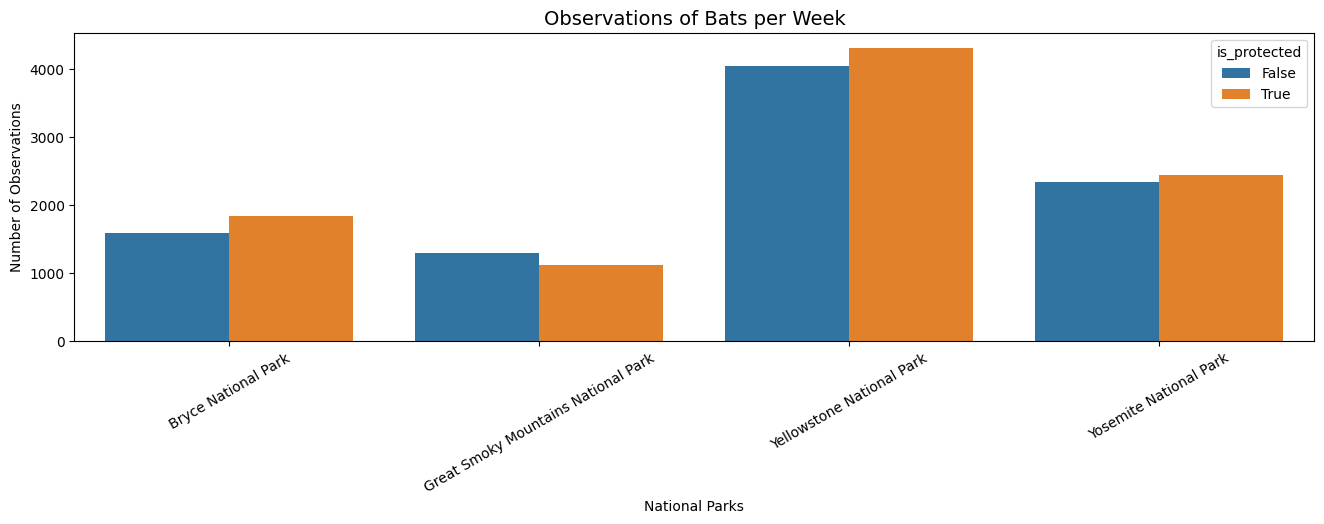

In [89]:
plt.figure(figsize = (16,4))
sns.barplot(x = bat_obs_park.park_name, y = bat_obs_park.observations, hue = bat_obs_park.is_protected)
plt.xlabel("National Parks")
plt.ylabel("Number of Observations")
plt.title("Observations of Bats per Week", size = 14)
plt.xticks(rotation=30)

plt.show()

## Conclusion

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.

#### Further Research
This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered.